
# Pytorch Tutorial

## 1. Basic Operations

In [31]:
import torch
import numpy as np

In [3]:
torch.cuda.is_available()

False

In [5]:
x = torch.empty(1)
print(x)

tensor([8.4078e-45])


In [6]:
x = torch.empty(3)
print(x)

tensor([7.0065e-45, 0.0000e+00, 0.0000e+00])


In [7]:
x = torch.empty(2,3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 1.8754e+28],
        [3.2175e+21, 8.3742e-10, 1.2914e-11]])


In [9]:
x = torch.rand(2,2)
print(x)

tensor([[0.9448, 0.6265],
        [0.8853, 0.4670]])


In [10]:
x = torch.ones(2,2)
print(x)

tensor([[1., 1.],
        [1., 1.]])


In [13]:
x = torch.zeros(2,2)
print(x)
print(x.dtype)

tensor([[0., 0.],
        [0., 0.]])
torch.float32


In [16]:
x = torch.ones(2,2, dtype=torch.float16)
print(x.dtype)
print(x.size())

torch.float16
torch.Size([2, 2])


In [17]:
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


In [21]:
x = torch.rand(2,2)
y = torch.rand(2,2)

print(x)
print(y)

z = x+y
z = torch.add(x,y)
print(z)

y.add_(x) # in-place addition
print(y)

z = x-y
z = torch.sub(x,y)

z = x*y
z = torch.mul(x,y)
y.mul_(x)

z = torch.div(x,y)

tensor([[0.5189, 0.3550],
        [0.2730, 0.9572]])
tensor([[0.4177, 0.0694],
        [0.5481, 0.5643]])
tensor([[0.9365, 0.4244],
        [0.8211, 1.5215]])
tensor([[0.9365, 0.4244],
        [0.8211, 1.5215]])


In [27]:
x = torch.rand(5,3)
print(x)
print(x[:,0])
print(x[1,1])
print(x[1,1].item()) # if only one element

tensor([[0.7489, 0.6066, 0.9058],
        [0.8456, 0.0597, 0.4443],
        [0.6439, 0.0173, 0.9627],
        [0.0030, 0.8649, 0.6860],
        [0.7764, 0.8451, 0.1274]])
tensor([0.7489, 0.8456, 0.6439, 0.0030, 0.7764])
tensor(0.0597)
0.059664130210876465


In [30]:
x = torch.rand(4,4)
print(x)

y = x.view(16)
print(y.size())

y = x.view(-1, 8)
print(y.size())

tensor([[0.2641, 0.2050, 0.8822, 0.9938],
        [0.4625, 0.3041, 0.5042, 0.4876],
        [0.5462, 0.0337, 0.5629, 0.6748],
        [0.1923, 0.3689, 0.2035, 0.4325]])
torch.Size([16])
torch.Size([2, 8])


In [33]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(type(b))

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>


In [34]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [36]:
x = torch.ones(5, requires_grad=True)
print(x)     # If gradient has to be calculated

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [186]:
torch.manual_seed(42)

a = torch.randn(3,3)
b = torch.randn(3,3)
print(a, '\n')
print(b)

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]]) 

tensor([[ 0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])


In [183]:
torch.t(a) # transpose

tensor([[ 0.3367,  0.2303,  2.2082],
        [ 0.1288, -1.1229, -0.6380],
        [ 0.2345, -0.1863,  0.4617]])

In [189]:
torch.cat((a,b), dim=1)

tensor([[ 0.3367,  0.1288,  0.2345,  0.2674,  0.5349,  0.8094],
        [ 0.2303, -1.1229, -0.1863,  1.1103, -1.6898, -0.9890],
        [ 2.2082, -0.6380,  0.4617,  0.9580,  1.3221,  0.8172]])

In [190]:
a.reshape(9,1)

tensor([[ 0.3367],
        [ 0.1288],
        [ 0.2345],
        [ 0.2303],
        [-1.1229],
        [-0.1863],
        [ 2.2082],
        [-0.6380],
        [ 0.4617]])

In [191]:
a.shape

torch.Size([3, 3])

## 2. Autograd

In [48]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x+2
print(y)

z = y*y*2
#z = z.mean()
print(z)

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/dx
print(x.grad)

tensor([2.1590, 1.2798, 1.2302], requires_grad=True)
tensor([4.1590, 3.2798, 3.2302], grad_fn=<AddBackward0>)
tensor([34.5949, 21.5141, 20.8687], grad_fn=<MulBackward0>)
tensor([1.6636e+00, 1.3119e+01, 1.2921e-02])


In [52]:
x = torch.randn(3, requires_grad=True)
print(x)

#x.requires_grad_(False)
#y = x.detach()
#print(x)
#print(y)

with torch.no_grad():
    y = x+2
    print(y)

tensor([-0.5204, -0.2818, -0.6965], requires_grad=True)
tensor([1.4796, 1.7182, 1.3035])


In [58]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [60]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    print(weights.grad)
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [63]:
weights = torch.ones(4, requires_grad=True)

optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad()

## 3. Backpropagation

In [67]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass

y_hat = w*x
loss = (y_hat-y)**2

print(loss)

# backward pass

loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## 4. Gradient Descent

In [73]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w*x

def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

lr = 0.01
n_iters = 100

for epoch in range(n_iters):
    
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    with torch.no_grad():
        w -= lr*w.grad
        
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


## 5. Training Pipeline

1) Design model (input, output size, forward pass) <br>
2) Construct loss and optimizer <br>
3) Training loop
  - forward pass : compute prediction 
  - backward pass : gradients
  - update weights

In [74]:
import torch.nn as nn

In [87]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

lr = 0.01
n_iters = 100

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() , lr = lr)

for epoch in range(n_iters):
    
    y_pred = model(X)
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = -2.788
epoch 1: w = -0.053, loss = 51.97446442
epoch 11: w = 1.601, loss = 1.35438085
epoch 21: w = 1.869, loss = 0.04415482
epoch 31: w = 1.914, loss = 0.00972569
epoch 41: w = 1.923, loss = 0.00833534
epoch 51: w = 1.926, loss = 0.00782884
epoch 61: w = 1.929, loss = 0.00737261
epoch 71: w = 1.931, loss = 0.00694347
epoch 81: w = 1.933, loss = 0.00653933
epoch 91: w = 1.935, loss = 0.00615871
Prediction after training: f(5) = 9.869


## 6. Linear Regression

In [89]:
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 4414.7188
epoch: 20, loss = 3295.4456
epoch: 30, loss = 2484.8518
epoch: 40, loss = 1897.2214
epoch: 50, loss = 1470.8311
epoch: 60, loss = 1161.1741
epoch: 70, loss = 936.1155
epoch: 80, loss = 772.4242
epoch: 90, loss = 653.2880
epoch: 100, loss = 566.5262


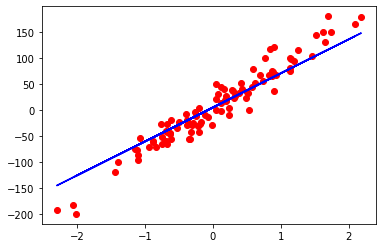

In [95]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

plt.show()

## 7. Logistic Regression

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [103]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(n_features)

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        #   
with torch.no_grad():
    y_predicted = model(X_test) 
    y_predicted_cls = y_predicted.round()
    
    acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.5897
epoch: 20, loss = 0.4864
epoch: 30, loss = 0.4212
epoch: 40, loss = 0.3761
epoch: 50, loss = 0.3427
epoch: 60, loss = 0.3169
epoch: 70, loss = 0.2961
epoch: 80, loss = 0.2790
epoch: 90, loss = 0.2646
epoch: 100, loss = 0.2522
accuracy = 0.8860


## 8. Data Loader

In [104]:
from torch.utils.data import Dataset, DataLoader
import math
import torchvision

In [195]:
class WineDataset(Dataset):
    
    def __init__(self):
        xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32(), skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples

In [115]:
dataset = WineDataset()

first_data = dataset[0]
features, labels = first_data
#print(features, labels)

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = dataiter.next()

features, labels = data
print(features, labels)

tensor([[1.3270e+01, 4.2800e+00, 2.2600e+00, 2.0000e+01, 1.2000e+02, 1.5900e+00,
         6.9000e-01, 4.3000e-01, 1.3500e+00, 1.0200e+01, 5.9000e-01, 1.5600e+00,
         8.3500e+02],
        [1.4220e+01, 3.9900e+00, 2.5100e+00, 1.3200e+01, 1.2800e+02, 3.0000e+00,
         3.0400e+00, 2.0000e-01, 2.0800e+00, 5.1000e+00, 8.9000e-01, 3.5300e+00,
         7.6000e+02],
        [1.2510e+01, 1.7300e+00, 1.9800e+00, 2.0500e+01, 8.5000e+01, 2.2000e+00,
         1.9200e+00, 3.2000e-01, 1.4800e+00, 2.9400e+00, 1.0400e+00, 3.5700e+00,
         6.7200e+02],
        [1.1820e+01, 1.7200e+00, 1.8800e+00, 1.9500e+01, 8.6000e+01, 2.5000e+00,
         1.6400e+00, 3.7000e-01, 1.4200e+00, 2.0600e+00, 9.4000e-01, 2.4400e+00,
         4.1500e+02]]) tensor([[3.],
        [1.],
        [2.],
        [2.]])


In [117]:
num_epochs = 2
total_samples = len(dataset)

n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i+1)%5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


## 8. Dataset Transforms

In [126]:
class WineDataset(Dataset):
    
    def __init__(self, transform=None):
        xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32(), skiprows=1)
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
   
    def __len__(self):
        return self.n_samples
    
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets      

In [127]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data

print(type(features), type(labels))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [128]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed) 
first_data = dataset[0]
features, labels = first_data

print(type(features), type(labels))

<class 'torch.Tensor'> <class 'torch.Tensor'>


## 9. SoftMax and CrossEntropy

In [131]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


In [140]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

0.38404151797294617
1.9127614498138428


In [142]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

tensor([0])
tensor([1])


In [143]:
loss = nn.CrossEntropyLoss() # Don't use softmax, Y_test is not one encoded

# 3 samples
Y = torch.tensor([2, 0, 1])

Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [2.0, 1.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

0.3018244206905365
2.061704158782959


## 10. Activation Functions

In [145]:
nn.ReLU()
nn.Sigmoid()
nn.Tanh()

torch.relu()
torch.sigmoid()

Tanh()

In [146]:
import torch.nn.functional as F

## 11. Forward Prop Net

In [148]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transf\orms as transforms
import matplotlib.pyplot as plt

In [151]:
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root ='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root ='./data', train=False, transform=transforms.ToTensor())

In [152]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


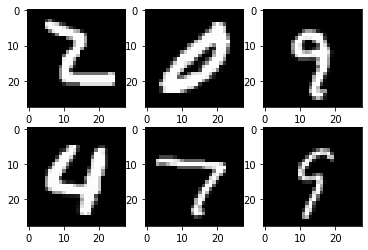

In [154]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [156]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, steps {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
    
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions==labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')
        

epoch 1/2, steps 100/600, loss = 0.3873
epoch 1/2, steps 200/600, loss = 0.3958
epoch 1/2, steps 300/600, loss = 0.2240
epoch 1/2, steps 400/600, loss = 0.2677
epoch 1/2, steps 500/600, loss = 0.2422
epoch 1/2, steps 600/600, loss = 0.1917
epoch 2/2, steps 100/600, loss = 0.2211
epoch 2/2, steps 200/600, loss = 0.4158
epoch 2/2, steps 300/600, loss = 0.2068
epoch 2/2, steps 400/600, loss = 0.1235
epoch 2/2, steps 500/600, loss = 0.1890
epoch 2/2, steps 600/600, loss = 0.3091
accuracy = 0.94


## 12. CNN

In [157]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [167]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [193]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root ='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root ='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
model = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%2000 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, steps {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        
        outputs = model(images)
    
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predictions==labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            
            if (label == pred):
                n_class_correct[label] +=1
            
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc} %')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Files already downloaded and verified
Files already downloaded and verified


NotImplementedError: 

## 11. Transfer Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

## 12. Train and Save Models

In [ ]:
PATH = 'model.pth'

In [ ]:
torch.save(arg, PATH) # tensor, dict, models

model = torch.load(PATH)
model.eval()

In [ ]:
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()

In [ ]:
checkpoint = {"epoch": 90, "model_state": model.state_dict(), "optim_state:": optimizer.state_dict()}

torch.save(checkpoint, "checkpoint.pth")
loaded_checkpoint = torch.load("checkpoint.pth")
epoch = loaded_checkpoint["epoch"]

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr = 0)

model.load_state_dict(checkpoint["model_state"])
optimizer.load_state_dict(checkpoint["optim_state"])
